In [2]:
# import Data Manipulation Libraries
import pandas as pd
import numpy as np

# import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import Data Logging Libraries
import logging
logging.basicConfig(filename='app.log', level=logging.INFO,
                        format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode="w", force=True)

In [4]:
url = "https://raw.githubusercontent.com/Digraskarpratik/Ml_Model/refs/heads/main/Concrete_Data.csv"

df = pd.read_csv(url)
df


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [15]:

from collections import OrderedDict

stats =  [] 

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Standard Deviation': df[i].std(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset= ["Missing", "Unique", "Mode", "Mean", "Median", "Standard Deviation", "Min", "Max", "Range", "Skewness", "Kurtosis", "IQR"], cmap = "Reds") 


,Feature,Type,Missing,Unique,Mode,Mean,Median,Standard Deviation,Min,Max,Range,Skewness,Kurtosis,IQR
0,Cement (component 1)(kg in a m^3 mixture),float64,0,280,362.600000,281.165631,272.900000,104.507142,102.000000,540.000000,438.000000,0.509517,-0.520663,157.625000
1,Blast Furnace Slag (component 2)(kg in a m^3 mixture),float64,0,187,0.000000,73.895485,22.000000,86.279104,0.000000,359.400000,359.400000,0.800737,-0.508139,142.950000
2,Fly Ash (component 3)(kg in a m^3 mixture),float64,0,163,0.000000,54.187136,0.000000,63.996469,0.000000,200.100000,200.100000,0.537445,-1.328505,118.270000
3,Water (component 4)(kg in a m^3 mixture),float64,0,205,192.000000,181.566359,185.000000,21.355567,121.750000,247.000000,125.250000,0.074324,0.122676,27.100000
4,Superplasticizer (component 5)(kg in a m^3 mixture),float64,0,155,0.000000,6.203112,6.350000,5.973492,0.000000,32.200000,32.200000,0.908113,1.413186,10.160000
5,Coarse Aggregate (component 6)(kg in a m^3 mixture),float64,0,284,932.000000,972.918592,968.000000,77.753818,801.000000,1145.000000,344.000000,-0.040206,-0.599001,97.400000
6,Fine Aggregate (component 7)(kg in a m^3 mixture),float64,0,304,594.000000,773.578883,779.510000,80.175427,594.000000,992.600000,398.600000,-0.252979,-0.102165,93.050000
7,Age (day),int64,0,14,28.000000,45.662136,28.000000,63.169912,1.000000,365.000000,364.000000,3.269177,12.168989,49.000000
8,"Concrete compressive strength(MPa, megapascals)",float64,0,938,33.398217,35.817836,34.442774,16.705679,2.331808,82.599225,80.267417,0.416922,-0.313844,22.429171


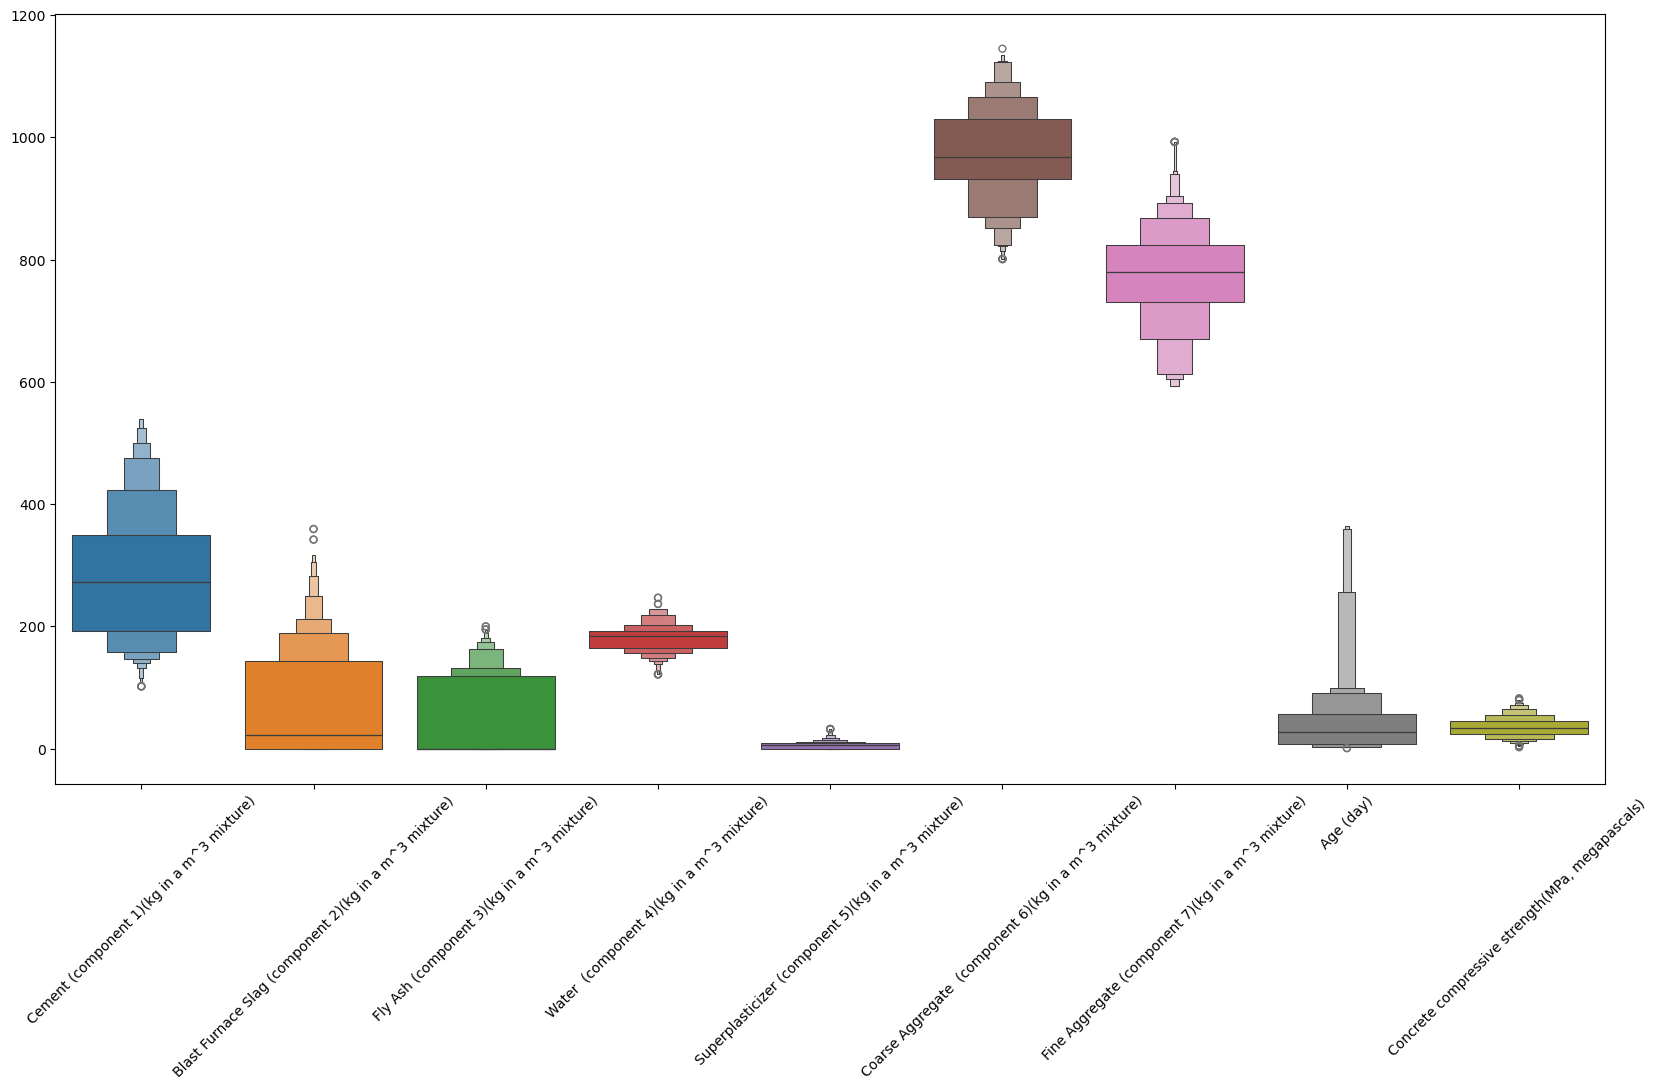

In [16]:
plt.figure(figsize=(20, 10))
sns.boxenplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [17]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [22]:
x = df.drop(columns= 'Concrete compressive strength(MPa, megapascals) ', axis= 1)

y = df['Concrete compressive strength(MPa, megapascals) ']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



In [24]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import r2_score

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.5943642890037384

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF = RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import r2_score

r2_score_RF = r2_score(y_test, y_pred_RF)

r2_score_RF

0.8878979345778145

In [29]:
# Saving Model as pickle file
 
import pickle

filename = 'concrete_strength_model.pkl'

pickle.dump(RF, open(filename, 'wb'))

logging.info('Model saved as pickle file')